### This Code calculates the dihedral angle distribution between H4-𝛂3 AND H2B𝛂2 helices in the nucleosome core at 0.15 M NaCl

In [93]:
## Import dependencies and Universes
import MDAnalysis as mda
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
import pyblock
import math

top1= '/home/augustine/Nucleosome_system/1kx5/1kx5_0.15M/dry_1kx5_015M_OPC.prmtop'
traj1='/home/augustine/Nucleosome_system/1kx5/1kx5_0.15M/dry_1kx5_015M_6us.xtc'
u1 = mda.Universe(top1, traj1)

topology_E76K= '/home/augustine/Nucleosome_system/E76K/E76K_0.15M/dry_E76K_15M_OPC.prmtop'
trajectory_E76K='/home/augustine/Nucleosome_system/E76K/E76K_0.15M/dry_E76K_015M_6us.xtc'
u2 = mda.Universe(topology_E76K, trajectory_E76K)

topology_R92T= '/home/augustine/Nucleosome_system/R92T/R92T_1/R92T_0.15M/dry_R92T_015M_OPC.prmtop'
trajectory_R92T='/home/augustine/Nucleosome_system/R92T/R92T_1/R92T_0.15M/dry_R92T_015M_6us.xtc'
u3 = mda.Universe(topology_R92T, trajectory_R92T)
#0.15M

#### Dihedral angle for wild type

In [4]:
##DIHEDRAL ANGLE BETWEEN H4-𝛂3 AND H2B-𝛂2 helices##
#Four C𝛂 atoms at the helix interface are selected to compute dihedral angles
selection = 'resname {} and resid {} and name {}'
a1 = selection.format('ARG', 521, 'CA')
a2 = selection.format('ASP', 514, 'CA')
a3 = selection.format('TYR', 739, 'CA')
a4 = selection.format('GLU', 732, 'CA')
dihed = u1.select_atoms("resid 521 514 739 732 and name CA")
psi = [a1, a2, a3, a4]
psi_angle = sum([u1.select_atoms(atom) for atom in psi]) # sum of Atoms creates an AtomGroup
psi_angle = psi_angle.dihedral # convert AtomGroup to Dihedral object

psi_list_1kx5_015M = []
for ts in u1.trajectory[8300:21000]:
    psi_list_1kx5_015M.append((ts.frame, psi_angle.value()))
print(psi_list_1kx5_015M)

#Covert Dihedral data in list to array and csv file using numpy and pandas for 1kx5
psi_list_1kx5_015M = np.array(psi_list_1kx5_015M)
DH = pd.DataFrame(psi_list_1kx5_015M)
DH.to_csv("Dihed_1kx5_015M_6us.csv")

[(8300, -22.036084820690682), (8301, -25.666480689092), (8302, -24.545008847440645), (8303, -27.692522218478928), (8304, -24.52486602139832), (8305, -24.195852415565255), (8306, -24.00095800896403), (8307, -25.931128316148374), (8308, -23.665747638196475), (8309, -26.591623816204432), (8310, -27.93388399541518), (8311, -28.089558443436722), (8312, -29.753327949926025), (8313, -26.4104549134614), (8314, -27.279675246730843), (8315, -28.108154585849146), (8316, -26.65541600096856), (8317, -23.968195772218973), (8318, -22.682831410822605), (8319, -19.977224486841898), (8320, -18.910084699763903), (8321, -25.409271752678407), (8322, -23.111421510970533), (8323, -24.003677755765064), (8324, -20.420814555577696), (8325, -24.317840447132717), (8326, -24.006098258444418), (8327, -26.941363856980903), (8328, -24.493344787846723), (8329, -23.915903557882334), (8330, -22.438966848713516), (8331, -25.61247356836655), (8332, -23.85425151620917), (8333, -18.682920579258283), (8334, -28.8044054339115

#### Dihedral angle for H2BE76K

In [6]:
##DIHEDRAL ANGLE BETWEEN H4-𝛂3 AND H2B-𝛂2 helices##
#Four C𝛂 atoms at the helix interface are selected to compute dihedral angles
selection = 'resname {} and resid {} and name {}'
a1 = selection.format('ARG', 521, 'CA')
a2 = selection.format('ASP', 514, 'CA')
a3 = selection.format('TYR', 739, 'CA')
a4 = selection.format('LYS', 732, 'CA')
dihed = u2.select_atoms("resid 521 514 739 732 and name CA")
psi = [a1, a2, a3, a4]
psi_angle2 = sum([u2.select_atoms(atom) for atom in psi]) # sum of Atoms creates an AtomGroup
psi_angle2 = psi_angle2.dihedral # convert AtomGroup to Dihedral object

psi_list_E76K = []
for ts in u2.trajectory[12000:25000]:
    psi_list_E76K.append((ts.frame, psi_angle2.value()))

print(psi_list_E76K)
#Covert Dihedral data in list to array and csv file using numpy and pandas for E76K
psi_list_E76K = np.array(psi_list_E76K)
DE = pd.DataFrame(psi_list_E76K)
DE.to_csv("Dihed_E76K_015M_6us.csv")

[(12000, -21.523153774056116), (12001, -25.26185720288813), (12002, -23.14925761017712), (12003, -24.85903151300652), (12004, -21.414175027969435), (12005, -22.403987150420974), (12006, -22.56286119964226), (12007, -26.120904199595575), (12008, -22.35124462425142), (12009, -18.528237259440154), (12010, -21.72329942484469), (12011, -22.20746730948053), (12012, -23.26412635104354), (12013, -19.493807890006952), (12014, -24.67511799614643), (12015, -19.621118985961196), (12016, -20.037416389068053), (12017, -27.46499822446735), (12018, -24.234228779586164), (12019, -15.544257557124832), (12020, -26.72480029423405), (12021, -25.65377397907742), (12022, -22.618720518906038), (12023, -28.876081502104707), (12024, -26.2326601251997), (12025, -28.246660850929434), (12026, -22.317736717208707), (12027, -21.91878350545022), (12028, -22.249614540551164), (12029, -24.186112330330815), (12030, -25.44892569029123), (12031, -21.27629367683035), (12032, -26.5409391572138), (12033, -18.948720626653824)

##### Dihedral angle for H4R92T

In [7]:
##DIHEDRAL ANGLE BETWEEN H4-𝛂3 AND H2B-𝛂2 helices##
#Four C𝛂 atoms at the helix interface are selected to compute dihedral angles
selection = 'resname {} and resid {} and name {}'
a1 = selection.format('THR', 521, 'CA')
a2 = selection.format('ASP', 514, 'CA')
a3 = selection.format('TYR', 739, 'CA')
a4 = selection.format('GLU', 732, 'CA')
dihed = u3.select_atoms("resid 521 514 739 732 and name CA")
psi = [a1, a2, a3, a4]
psi_angle3 = sum([u3.select_atoms(atom) for atom in psi]) # sum of Atoms creates an AtomGroup
psi_angle3 = psi_angle3.dihedral # convert AtomGroup to Dihedral object

psi_list_R92T = []
for ts in u3.trajectory[12000:25000]:
    psi_list_R92T.append((ts.frame, psi_angle3.value()))

print(psi_list_R92T)
#Covert Dihedral data in list to array and csv file using numpy and pandas for R92T
psi_list_R92T = np.array(psi_list_R92T)
DR = pd.DataFrame(psi_list_R92T)
DR.to_csv("Dihed_R92T_015M_6us.csv")

[(12000, -25.91177402641164), (12001, -24.809248968749813), (12002, -27.613320263526944), (12003, -23.74975216820453), (12004, -25.87459784032511), (12005, -24.111466452251236), (12006, -24.188026933968988), (12007, -21.993463029727046), (12008, -24.259258946924398), (12009, -17.560587274523368), (12010, -20.551078882565974), (12011, -23.126181363718082), (12012, -22.382326734250082), (12013, -26.729023186633487), (12014, -22.629281445156163), (12015, -22.38821385897536), (12016, -25.14453028016775), (12017, -21.79546751357904), (12018, -23.56825807693847), (12019, -26.111732153607257), (12020, -20.3713062080599), (12021, -21.971883148581387), (12022, -23.211320656662842), (12023, -20.804895258935165), (12024, -21.04265552696834), (12025, -19.452614672895873), (12026, -18.484558419372817), (12027, -18.623636486645875), (12028, -25.37649158539121), (12029, -21.660181702122756), (12030, -20.931730500717027), (12031, -20.140746322275618), (12032, -20.58349022081186), (12033, -19.037879645

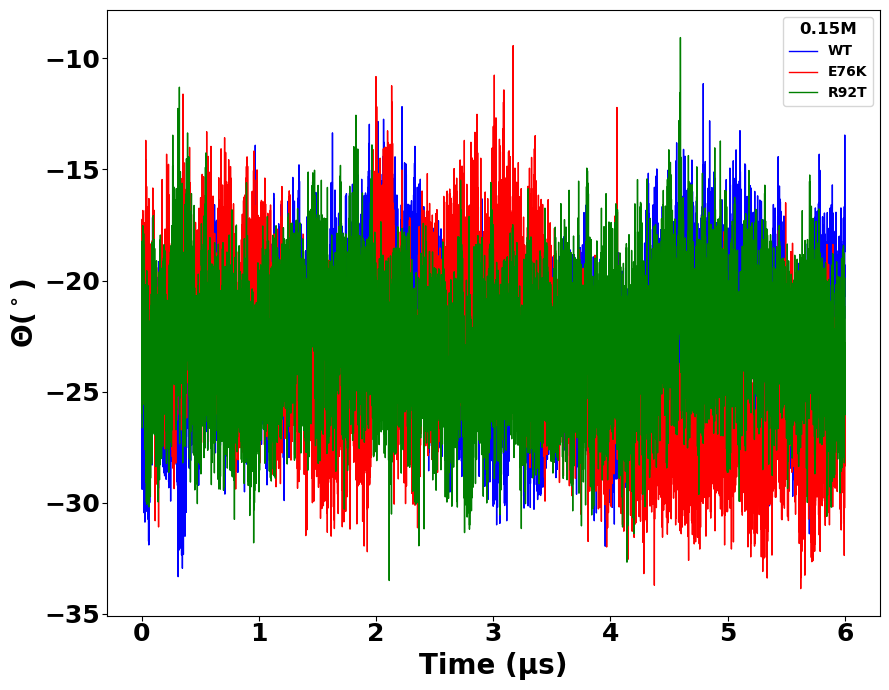

In [17]:
# quick plot of Dihedral Angle against time for all systems at 6 𝝁s
plt.subplots(figsize=(9, 7))
plt.plot(DH[0]/3500, DH[1], color='blue', lw=1, label="WT")
plt.plot(DE[0]/4166.667, DE[1], color='r', lw=1, label="E76K")
plt.plot(DR[0]/4166.667, DR[1], color='green', lw=1, label="R92T")
#plt.xlim([0, 300])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Time (\u03BCs)", fontsize = 20.0, fontweight="bold")
plt.ylabel(r"${\Theta}$($^\circ$)", fontsize = 20.0, fontweight="bold")
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.tick_params(labelsize=18, pad=1)
plt.tight_layout()
plt.legend(loc='upper right', fontsize='large', title='0.15M', title_fontsize='large', prop={'weight':'bold'})
plt.show()

In [2]:
### Computing the mean and standard deviation for each system 
D1=pd.read_csv('Dihed_1kx5_015M_6us.csv')
D2=pd.read_csv('Dihed_E76K_015M_6us.csv')
D3=pd.read_csv('Dihed_R92T_015M_6us.csv')

# Calculate the average
D1_mean = np.mean(D1['1'])
D2_mean = np.mean(D2['1'])
D3_mean = np.mean(D3['1'])
# Calculate the standard deviation
D1_std = np.std(D1['1'])
D2_std = np.std(D2['1'])
D3_std = np.std(D3['1'])
D1_std
# Create lists for the plot
Nucleosome_Systems = ['1KX5', 'E76K', 'R92T']
x_pos = np.arange(len(Nucleosome_Systems))
Dihed = [D1_mean, D2_mean, D3_mean]
error = [D1_std, D2_std, D3_std]

In [5]:
### Block averaging of each dihedral angles of each system
import pyblock
D1=pd.read_csv('Dihed_1kx5_015M_6us.csv')
D1=D1['1']
D1=D1.to_numpy()
reblock_data = pyblock.blocking.reblock(D1)
opt = pyblock.blocking.find_optimal_block(len(D1), reblock_data)
print(opt)
print(reblock_data[opt[0]])

print("..........................................................................................................")
D2=pd.read_csv('Dihed_E76K_015M_6us.csv')
D2=D2['1']
D2=D2.to_numpy()
reblock_data = pyblock.blocking.reblock(D2)
for reblock_iter in reblock_data:
    print(reblock_iter)

print("..........................................................................................................")
D3=pd.read_csv('Dihed_R92T_015M_6us.csv')
D3=D3['1']
D3=D3.to_numpy()
reblock_data = pyblock.blocking.reblock(D3)
for reblock_iter in reblock_data:
    print(reblock_iter)


[11]
BlockTuple(block=11, ndata=6, mean=array(-25.99867386), cov=array(1.83752749), std_err=array(0.55340273), std_err_err=array(0.17500131))
..........................................................................................................
BlockTuple(block=0, ndata=13000, mean=array(-24.91271471), cov=array(16.29984637), std_err=array(0.03540952), std_err_err=array(0.00021961))
BlockTuple(block=1, ndata=6500, mean=array(-24.91271471), cov=array(13.56511134), std_err=array(0.04568304), std_err_err=array(0.0004007))
BlockTuple(block=2, ndata=3250, mean=array(-24.91271471), cov=array(12.0214194), std_err=array(0.06081857), std_err_err=array(0.00075448))
BlockTuple(block=3, ndata=1625, mean=array(-24.91271471), cov=array(10.88399444), std_err=array(0.08184035), std_err_err=array(0.00143602))
BlockTuple(block=4, ndata=812, mean=array(-24.91066998), cov=array(9.93760607), std_err=array(0.11062744), std_err_err=array(0.00274687))
BlockTuple(block=5, ndata=406, mean=array(-24.91066998

In [98]:
Nucleosome_Systems = ['WT', 'E76K', 'R92T']
x_pos = np.arange(len(Nucleosome_Systems))
Dihed = [-25.99867386, -24.81076276, -24.0907473]
error = [0.55340273, 0.94593185, 0.3112105]

/tmp/ipykernel_13909/3026467813.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), weight='bold', fontsize = 14.0)


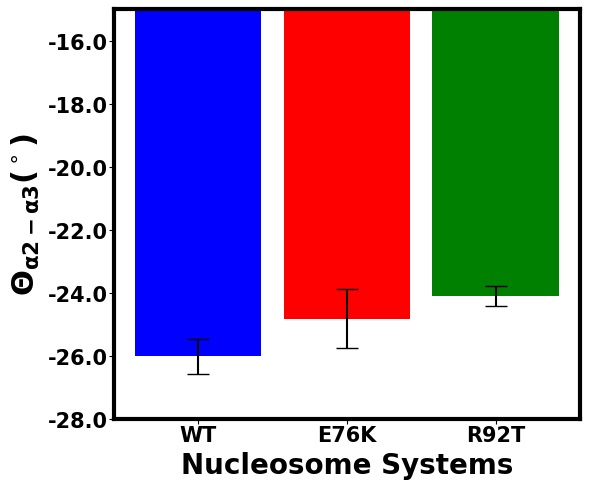

In [100]:
# Bar plot for the average dihedral angles of the systems
fig, ax = plt.subplots(figsize=(6, 5))
colors=['blue', 'red', 'green']
ax.bar(x_pos, Dihed, yerr=error, align='center', ecolor='black', color=colors, capsize=8, width=0.85)
ax.set_ylabel(r'$\bf{\Theta}_{\alpha2-\alpha3}$($^\circ$)', fontsize = 22.0, fontweight="bold", )
ax.set_xlabel(r"Nucleosome Systems", fontsize = 20.0, fontweight="bold")
ax.set_xticks(x_pos)
plt.ylim(-28,-15)
ax.set_yticklabels(ax.get_yticks(), weight='bold', fontsize = 14.0)
ax.set_xticklabels(Nucleosome_Systems, weight='bold', fontsize = 14.0)
plt.tick_params(labelsize=15, pad=1)
ax.spines["top"].set_linewidth(3)
ax.spines["left"].set_linewidth(3)
ax.spines["right"].set_linewidth(3)
ax.spines["bottom"].set_linewidth(3)
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

# Show figure
plt.tight_layout()
plt.show()

/tmp/ipykernel_13909/3576069173.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), weight='bold')


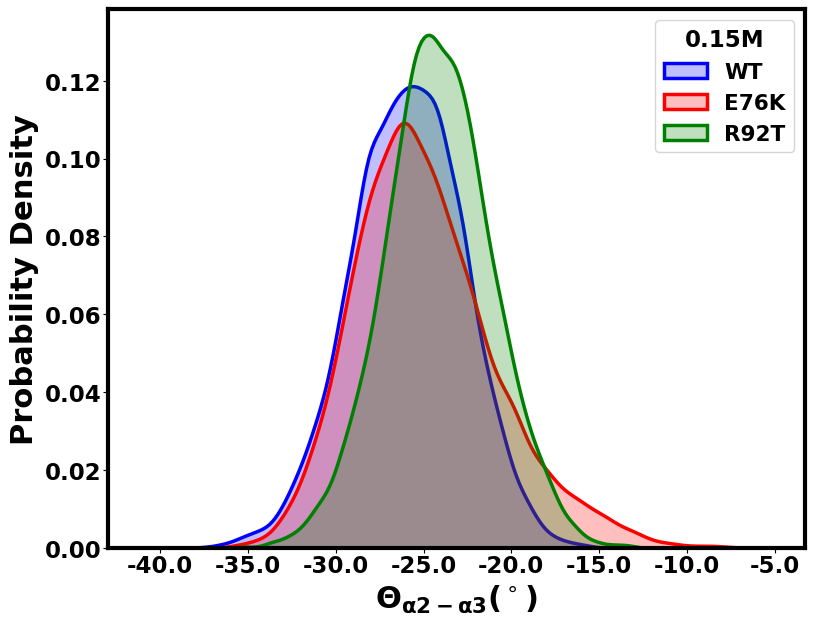

In [101]:
### Probability Distribution of the Dihedral angle of all systems
fig, ax = plt.subplots(figsize=(9, 7))
sns.kdeplot(data=D1['1'], color='blue',fill=True, linewidth=2.5, legend=True, label='WT')
sns.kdeplot(data=D2['1'], color='red',fill=True, linewidth=2.5, legend=True, label='E76K')
sns.kdeplot(data=D3['1'], color='green',fill=True, linewidth=2.5, legend=True, label='R92T')
plt.tick_params(labelsize=16.5, pad=1)
#ax.set_yticklabels(ax.get_yticks(), weight='bold')
ax.set_xticklabels(ax.get_xticks(), weight='bold')
plt.xlabel(r'$\bf{\Theta}_{\alpha2-\alpha3}$($^\circ$)', fontsize = 22.0, fontweight="bold")
plt.ylabel('Probability Density', fontsize = 22.0, fontweight="bold")
plt.legend(loc='upper right', fontsize=15.5, title='0.15M', title_fontsize=16.5)
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
ax.spines["top"].set_linewidth(3)
ax.spines["left"].set_linewidth(3)
ax.spines["right"].set_linewidth(3)
ax.spines["bottom"].set_linewidth(3)
plt.savefig('Dihedral_A2A32_015M_prob2_edit.svg',format='svg', dpi=600,transparent=False)
plt.show()